In [86]:
import csv
import numpy as np

def read_vertices(file):
    vertices_dict = {}
    with open(file, encoding='utf-8-sig', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            vertices_dict[int(row['Id'])] = row['Label']
    return vertices_dict

vertices_dict = read_vertices("../sommets.csv")
vertices_dict

{11: 'Valjean',
 48: 'Gavroche',
 55: 'Marius',
 27: 'Javert',
 25: 'Thenardier',
 23: 'Fantine',
 58: 'Enjolras',
 62: 'Courfeyrac',
 64: 'Bossuet',
 63: 'Bahorel',
 65: 'Joly',
 24: 'MmeThenardier',
 26: 'Cosette',
 41: 'Eponine',
 57: 'Mabeuf',
 59: 'Combeferre',
 61: 'Feuilly',
 0: 'Myriel',
 66: 'Grantaire',
 68: 'Gueulemer',
 69: 'Babet',
 70: 'Claquesous',
 16: 'Tholomyes',
 60: 'Prouvaire',
 71: 'Montparnasse',
 29: 'Bamatabois',
 17: 'Listolier',
 18: 'Fameuil',
 19: 'Blacheville',
 20: 'Favourite',
 21: 'Dahlia',
 22: 'Zephine',
 49: 'Gillenormand',
 51: 'MlleGillenormand',
 75: 'Brujon',
 76: 'MmeHucheloup',
 34: 'Judge',
 35: 'Champmathieu',
 36: 'Brevet',
 37: 'Chenildieu',
 38: 'Cochepaille',
 28: 'Fauchelevent',
 31: 'Simplice',
 54: 'LtGillenormand',
 2: 'MlleBaptistine',
 3: 'MmeMagloire',
 39: 'Pontmercy',
 42: 'Anzelma',
 43: 'Woman2',
 72: 'Toussaint',
 12: 'Marguerite',
 30: 'Perpetue',
 33: 'Woman1',
 44: 'MotherInnocent',
 47: 'MmeBurgon',
 50: 'Magnon',
 52: 'Mm

In [87]:
def read_arches(file):
    arches_list = []
    with open(file, encoding='utf-8-sig', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            arches_list.append((int(row['Source']), int(row['Target']), int(row['Weight'])))
    return arches_list

arches_list = read_arches("../arcs.csv")
arches_list

[(1, 0, 1),
 (2, 0, 8),
 (3, 0, 10),
 (3, 2, 6),
 (4, 0, 1),
 (5, 0, 1),
 (6, 0, 1),
 (7, 0, 1),
 (8, 0, 2),
 (9, 0, 1),
 (11, 0, 5),
 (11, 2, 3),
 (11, 3, 3),
 (11, 10, 1),
 (12, 11, 1),
 (13, 11, 1),
 (14, 11, 1),
 (15, 11, 1),
 (17, 16, 4),
 (18, 16, 4),
 (18, 17, 4),
 (19, 16, 4),
 (19, 17, 4),
 (19, 18, 4),
 (20, 16, 3),
 (20, 17, 3),
 (20, 18, 3),
 (20, 19, 4),
 (21, 16, 3),
 (21, 17, 3),
 (21, 18, 3),
 (21, 19, 3),
 (21, 20, 5),
 (22, 16, 3),
 (22, 17, 3),
 (22, 18, 3),
 (22, 19, 3),
 (22, 20, 4),
 (22, 21, 4),
 (23, 11, 9),
 (23, 12, 2),
 (23, 16, 3),
 (23, 17, 3),
 (23, 18, 3),
 (23, 19, 3),
 (23, 20, 4),
 (23, 21, 4),
 (23, 22, 4),
 (24, 11, 7),
 (24, 23, 2),
 (25, 11, 12),
 (25, 23, 1),
 (25, 24, 13),
 (26, 11, 31),
 (26, 16, 1),
 (26, 24, 4),
 (26, 25, 1),
 (27, 11, 17),
 (27, 23, 5),
 (27, 24, 1),
 (27, 25, 5),
 (27, 26, 1),
 (28, 11, 8),
 (28, 27, 1),
 (29, 11, 2),
 (29, 23, 1),
 (29, 27, 1),
 (30, 23, 1),
 (31, 11, 3),
 (31, 23, 2),
 (31, 27, 1),
 (31, 30, 2),
 (32, 11, 

In [143]:
WIDTH, HEIGHT = 1200, 600

X_OFFSET = 10
Y_AXE = HEIGHT - 100

# Associate a position on the x axis with each id
x_labels = np.linspace(X_OFFSET, WIDTH - X_OFFSET, len(vertices_dict))
id_list_sorted = sorted(list(vertices_dict.keys()))
id_x_dict = {id : x for id, x in zip(id_list_sorted, x_labels)}

# Randomly choose a color associated to each id
color_palette = ('#393b79','#5254a3','#6b6ecf','#9c9ede','#637939','#8ca252','#b5cf6b','#cedb9c',
                 '#8c6d31','#bd9e39','#e7ba52','#e7cb94','#843c39','#ad494a','#d6616b','#e7969c',
                 '#7b4173','#a55194','#ce6dbd','#de9ed6'
                )
id_color_dict = {id : random_choice(color_palette) for id in id_list_sorted}

def setup():
    size(WIDTH, HEIGHT)
    
    background(255)
    no_loop()

def draw():
    # Draw the labels
    for id, x in id_x_dict.items():
        with push():
            # Draw dot
            fill(id_color_dict[id])
            stroke(id_color_dict[id])
            translate(x, Y_AXE)
            circle(0, 0, 4)

            # Draw label
            fill(0)
            rotate(PI/2)
            translate(5, -2)
            text_align(LEFT, CENTER)
            text(vertices_dict[id], 0, 0)

    # Draw the arches        
    for source, destination, weight in arches_list:
        x_source = id_x_dict[source]
        x_destination = id_x_dict[destination]

        middle = (x_source + x_destination) / 2
        diameter = abs(x_destination - x_source)

        color_source = id_color_dict[source]
        color_destination = id_color_dict[destination]

        with push_style():
            stroke(color_source, 150)
            stroke_cap(SQUARE)
            stroke_weight(weight)
            no_fill()
            arc(middle, Y_AXE, diameter, diameter, PI, TWO_PI)

run_sketch()

In [117]:
save_frame("./dataviz_0001.png", use_thread=True)

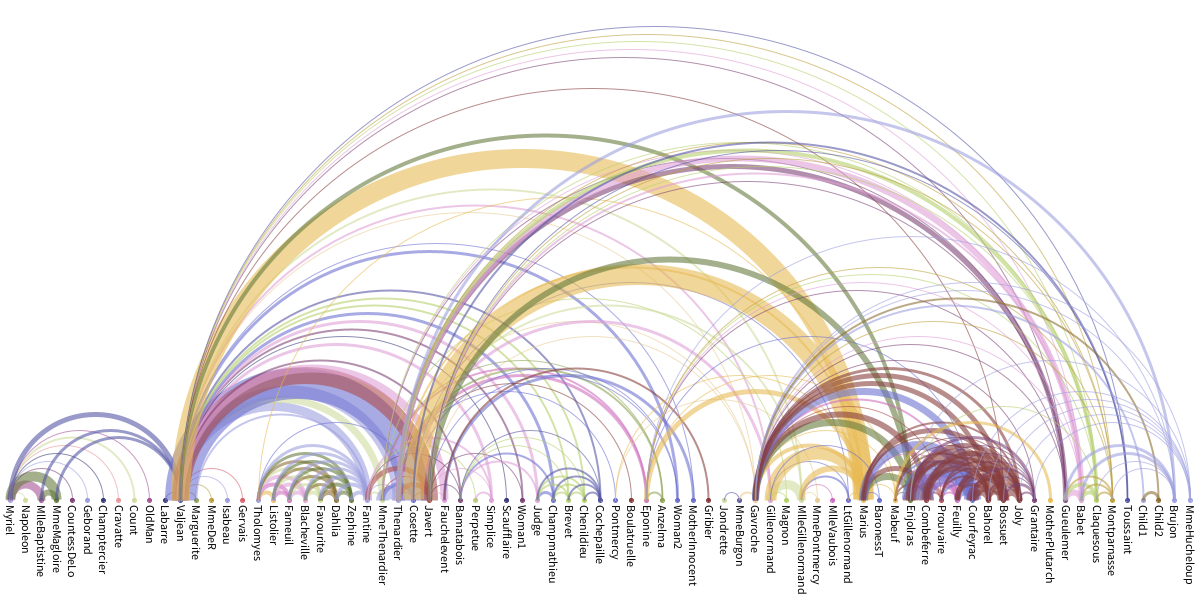

In [179]:
WIDTH, HEIGHT = 700, 700

CIRCLE_DIAMETER = 500
CONTROL_POINTS_OFFSET = 500

# Associate a position on the circle with each id
# Create a larger invisible circle for the control points of the curves 
angles_list = np.linspace(0, TWO_PI, num= len(vertices_dict.keys()), endpoint= False)
id_list_sorted = sorted(list(vertices_dict.keys()))

id_vec_dict, id_vec_invis_dict = {}, {}
for id, angle in zip(id_list_sorted, angles_list):
    # Normal circle
    vec = Py5Vector.from_heading(angle)
    vec.mag = CIRCLE_DIAMETER / 2
    id_vec_dict[id] = vec
    
    # Invisible circle
    vec2 = Py5Vector.from_heading(angle)
    vec2.mag = (CIRCLE_DIAMETER / 2) + CONTROL_POINTS_OFFSET
    id_vec_invis_dict[id] = vec2

# Randomly choose a color associated to each id
color_palette = ('#393b79','#5254a3','#6b6ecf','#9c9ede','#637939','#8ca252','#b5cf6b','#cedb9c',
                 '#8c6d31','#bd9e39','#e7ba52','#e7cb94','#843c39','#ad494a','#d6616b','#e7969c',
                 '#7b4173','#a55194','#ce6dbd','#de9ed6'
                )
id_color_dict = {id : random_choice(color_palette) for id in id_list_sorted}

def setup():
    size(WIDTH, HEIGHT)
    
    background(255)
    no_loop()

def draw():
    translate(width/2, height/2)
    stroke(0, 75)
    circle(0, 0, CIRCLE_DIAMETER)
    
    # Draw the labels
    for id, vec in id_vec_dict.items():
        with push():
            # Draw dot
            fill(id_color_dict[id])
            stroke(id_color_dict[id])
            circle(*vec, 6)
                
            # Draw label
            fill(0)
            translate(*vec)
            rotate(Py5Vector(*vec).heading)
            translate(10, -2)            
            text_align(LEFT, CENTER)
            text(vertices_dict[id], 0, 0)
        
    # Draw the curves       
    for source, destination, weight in arches_list:
        vec_source = id_vec_dict[source]
        vec_destination = id_vec_dict[destination]
        
        vec_source_invis = id_vec_invis_dict[source]
        vec_destination_invis = id_vec_invis_dict[destination]

        color_source = id_color_dict[source]
        color_destination = id_color_dict[destination]

        with push_style():
            stroke(color_source, 150)
            stroke_cap(ROUND)
#             stroke_weight(weight)
            no_fill()
            curve(*vec_source_invis, *vec_source, *vec_destination, *vec_destination_invis)

run_sketch()

In [180]:
save_frame("./dataviz_0002.png", use_thread=True)

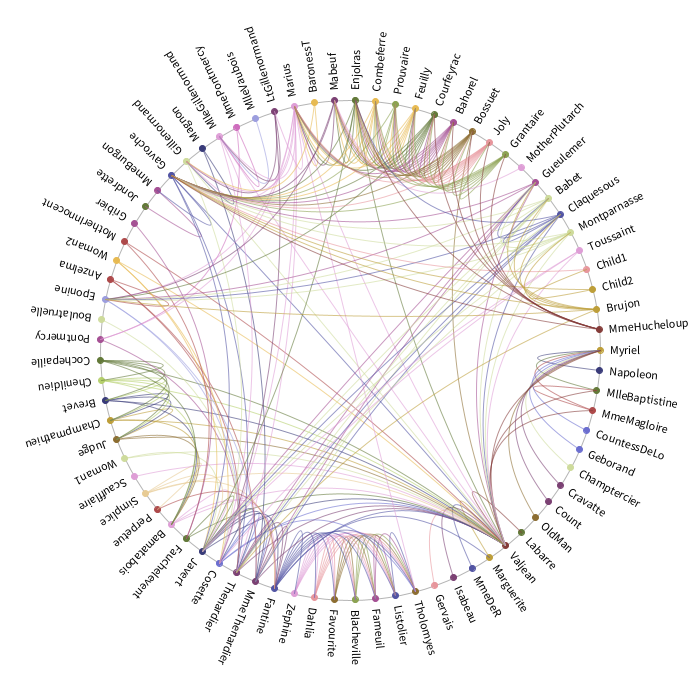